In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Season = ["Winter", "Spring", "Summer", "Autumn"]

In [4]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4 + 2

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz

# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)


lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lon = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lev = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lon1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lat1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
Lev1 = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year)) 


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lon2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lat2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
Lev2 = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year)) 

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")

(7, 21, 24, 10, 12, 1)


In [5]:
# for first 6 altitude injections

directory1 = '../Post_process_0.05um/Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)


for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line1 in Lines1:
                a = line1.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon1[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat1[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev1[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1
                        

  0%|          | 0/12 [00:00<?, ?it/s]

../Post_process_0.05um/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:08<00:00,  1.39it/s]


In [6]:
# for 21-km injection

directory2 = '../Post_process_0.05um/21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)


for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            data_x = []
            data_y = []
            data_z = []
            for line2 in Lines2:
                a = line2.split(',')
                data.append(float(a[0])) # total lifetime
                data_N.append(float(a[1])) # total N lifetime
                data_S.append(float(a[2])) # total S lifetime
                data_x.append(float(a[3])) # lon
                data_y.append(float(a[4])) # lat
                data_z.append(float(a[5])) # p
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        Lon2[iz,iy,ix,i_day,i_month,i_year] = data_x[i]
                        Lat2[iz,iy,ix,i_day,i_month,i_year] = data_y[i]
                        Lev2[iz,iy,ix,i_day,i_month,i_year] = data_z[i]

                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

../Post_process_0.05um/21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:03<00:00,  3.35it/s]


In [7]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
Lon[0:4,:,:,:,:,:] = Lon1[0:4,:,:,:,:,:]
Lat[0:4,:,:,:,:,:] = Lat1[0:4,:,:,:,:,:]
Lev[0:4,:,:,:,:,:] = Lev1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
Lon[4,:,:,:,:,:] = Lon2[0,:,:,:,:,:]
Lat[4,:,:,:,:,:] = Lat2[0,:,:,:,:,:]
Lev[4,:,:,:,:,:] = Lev2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
Lon[5:7,:,:,:,:,:] = Lon1[4:6,:,:,:,:,:]
Lat[5:7,:,:,:,:,:] = Lat1[4:6,:,:,:,:,:]
Lev[5:7,:,:,:,:,:] = Lev1[4:6,:,:,:,:,:]

### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [8]:
LON_1d = Lon[0,0,:,0,0,0]
LAT_1d = Lat[0,:,0,0,0,0]

In [9]:
# First for LON: change (0,360) to (-180,180)

#################
# correst method 1:
#################
# lifetime_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_N_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))
# lifetime_S_season_mean_new = np.zeros((Nz, Ny, Nx, N_season))

# print("LON Before: ", LON_1d)

# for i in range(len(LON_1d)):
#     if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

# # sort
# idx = np.argsort(LON_1d)
# # print(idx)

# LON_1d = LON_1d[idx]
# lifetime_season_mean_new = lifetime_season_mean[:,:,idx,:]
# lifetime_N_season_mean_new = lifetime_N_season_mean[:,:,idx,:]
# lifetime_S_season_mean_new = lifetime_S_season_mean[:,:,idx,:]

# print("LON After: ", LON_1d)

# print("")
# print(lifetime_season_mean_new.shape)


#################
# wrong method 2:
#################

lifetime_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON_1d = LON_1d - 180 ### shw ???


Lon_new = Lon - 180
Lat_new = Lat

lifetime_new = lifetime[:,:,:,:,:,:]
lifetime_N_new = lifetime_N[:,:,:,:,:,:]
lifetime_S_new = lifetime_S[:,:,:,:,:,:]

In [10]:
# Second for LAT: change (-20,20) to (20,-20)

Lon_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
Lat_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S_new2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)

Lon_new2 = Lon_new[:,::-1,:,:,:,:]
Lat_new2 = Lat_new[:,::-1,:,:,:,:]

lifetime_new2 = lifetime_new[:,::-1,:,:,:,:]
lifetime_N_new2 = lifetime_N_new[:,::-1,:,:,:,:]
lifetime_S_new2 = lifetime_S_new[:,::-1,:,:,:,:]

print("")
print(lifetime_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(7, 21, 24, 10, 12, 1)


## Seasonal mean

In [11]:


# lifetime(Nz, Ny, Nx, N_day, N_month, N_year)

lifetime_mon = np.mean(lifetime_new, axis=(3,5))
lifetime_N_mon = np.mean(lifetime_N_new, axis=(3,5))
lifetime_S_mon = np.mean(lifetime_S_new, axis=(3,5))


# lifetime_mon(Nz, Ny, Nx, N_month)
N_season = 4

lifetime_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_N_season = np.zeros((Nz, Ny, Nx, N_season))
lifetime_S_season = np.zeros((Nz, Ny, Nx, N_season))


# for Winter
lifetime_season[:,:,:,0]   = np.mean(lifetime_mon[:,:,:,[0,1,11]], axis=3)
lifetime_N_season[:,:,:,0] = np.mean(lifetime_N_mon[:,:,:,[0,1,11]], axis=3)
lifetime_S_season[:,:,:,0] = np.mean(lifetime_S_mon[:,:,:,[0,1,11]], axis=3)
    
# for Spring, Summer and Autumn
for i in range(1,N_season):
    print(i,i*3-1,(i+1)*3-1)
    lifetime_season[:,:,:,i]   = np.mean(  lifetime_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_N_season[:,:,:,i] = np.mean(lifetime_N_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    lifetime_S_season[:,:,:,i] = np.mean(lifetime_S_mon[:,:,:,i*3-1:(i+1)*3-1], axis=3)
    
lifetime_season.shape

1 2 5
2 5 8
3 8 11


(7, 21, 24, 4)

## Strategy_Uni

In [12]:
Inject_Percent_Uni = np.zeros((Nz, Ny, Nx, N_season))
Inject_Percent_Uni[:,:,:,:] = 1/(Nx*Ny)*100 # (unit: %)

D_lifetime_uniform = lifetime_N_season[:,:,:,:] - lifetime_S_season[:,:,:,:]

In [13]:
Nx*Ny

504

In [14]:
# Inject_Percent_Uni

## Strategy_LP

In [15]:
# LP solver

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

# (Nz, Ny, Nx, N_season)

Inject_Percent_LP = np.zeros((Nz, Ny, Nx, N_season))

Result_season  = lifetime_season[0,:,:,:]*0.0
Lifetime_LP    = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_N  = lifetime_season[:,:,:,:]*0.0
Lifetime_LP_S  = lifetime_season[:,:,:,:]*0.0
D_lifetime_LP  = lifetime_season[:,:,:,:]*0.0

iz = 1

Diff_NS = 0.01

# for LP solve: max lifetime under the interhemispheric balance
for iz in range(Nz):
    print(iz)
    for iseason in range(N_season):
        Life   = lifetime_season[iz,:,:,iseason].flatten()
        Life_S = lifetime_N_season[iz,:,:,iseason].flatten()
        Life_N = lifetime_S_season[iz,:,:,iseason].flatten()

        if sum(Life_S)+sum(Life_N)-sum(Life)>0.01: print("ERROR!!!")
    
        N = len(Life)

        #
        c = -1*Life

        Xs_bounds = []
        A1 = []
        A3 = []
        A4 = []
        A  = []
        for i in range(N):
            Xs_bounds.append((0, N))
            A1.append(1)
            A3.append( Life_N[i] -Life_S[i] -Diff_NS*Life[i] )
            A4.append( -1*(Life_N[i] -Life_S[i] +Diff_NS*Life[i]) )

        Aub = [A3,A4]
        Aeq = [A1]   

        b_ub = [0,0]
        b_eq = [N]

        from scipy.optimize import linprog
        res = linprog(c, A_eq=Aeq, b_eq=b_eq, A_ub=Aub, b_ub=b_ub, bounds=Xs_bounds)
    
        # post-process, calculate the injection percentage
        Result1d = np.round(res.x)
        Result2d = Result1d.reshape(Ny,Nx)
        Result2d = Result2d/np.sum(Result2d)*100
    
        Result_season[:,:,iseason] = Result2d
    
    Inject_Percent_LP[iz,:,:,:] = Result_season # (unit: %)
    
    Lifetime_LP[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Result_season/100)

    Lifetime_LP_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Result_season/100)
    Lifetime_LP_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Result_season/100)
    D_lifetime_LP[iz,:,:,:] = Lifetime_LP_N[iz,:,:,:] - Lifetime_LP_S[iz,:,:,:]

print(lifetime_season[:,:,:,:].shape, Result_season.shape)


0
1
2
3
4
5
6
(7, 21, 24, 4) (21, 24, 4)


## Stratege_Y

In [16]:
# get max lifetime by only selecting LAT (averaged over all LON)

Inject_Percent_Y = np.zeros((Nz, Ny, Nx, N_season))

lifetime_season_Xmean   = np.mean(lifetime_season, axis=2)
lifetime_N_season_Xmean = np.mean(lifetime_N_season, axis=2)
lifetime_S_season_Xmean = np.mean(lifetime_S_season, axis=2)
print(lifetime_season_Xmean.shape)

Inject_percent    = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat   = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_N = np.zeros((Nz, Ny, N_season))
Lifetime_MaxLat_S = np.zeros((Nz, Ny, N_season))
D_lifetime_MaxLat = np.zeros((Nz, Ny, N_season))
print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = np.mean(lifetime_season[iz,:,:,i_season], axis=1)
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape)
#         print(iz,idx[0],i_season)
        Inject_percent[iz,idx[0],i_season] = 100
        Inject_Percent_Y[iz,idx[0],:,i_season] = 1.0/Nx*100 # (unit:%)

    Lifetime_MaxLat[iz,:,:] = lifetime_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)

    Lifetime_MaxLat_N[iz,:,:] = lifetime_N_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    Lifetime_MaxLat_S[iz,:,:] = lifetime_S_season_Xmean[iz,:,:]* (Inject_percent[iz,:,:]/100)
    D_lifetime_MaxLat[iz,:,:] = Lifetime_MaxLat_N[iz,:,:] - Lifetime_MaxLat_S[iz,:,:]

(7, 21, 4)
(7, 21, 4)


In [17]:
# Inject_Percent_Y[1,:,:,0]

## Strategy_XY

In [18]:
# get the max lifetime by selecting both LON and LAT

Inject_Percent_XY = np.zeros((Nz, Ny, Nx, N_season))

Inject_percent = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max   = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_N = np.zeros((Nz, Ny, Nx, N_season))
Lifetime_max_S = np.zeros((Nz, Ny, Nx, N_season))
D_lifetime_max = np.zeros((Nz, Ny, Nx, N_season))

print(Inject_percent.shape)

for iz in range(Nz):
    for i_season in range(N_season):
        a   = lifetime_season[iz,:,:,i_season]
        # Converts a flat index or array of flat indices into a tuple of coordinate arrays
        idx = np.unravel_index(np.argmax(a, axis=None), a.shape) 
#         print(iz,idx[0],idx[1],i_season)
        Inject_percent[iz,idx[0],idx[1],i_season] = 100
        Inject_Percent_XY[iz,idx[0],idx[1],i_season] = 100 # (unit:%)

    Lifetime_max[iz,:,:,:] = lifetime_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)

    Lifetime_max_N[iz,:,:,:] = lifetime_N_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    Lifetime_max_S[iz,:,:,:] = lifetime_S_season[iz,:,:,:]* (Inject_percent[iz,:,:,:]/100)
    D_lifetime_max[iz,:,:,:] = Lifetime_max_N[iz,:,:,:] - Lifetime_max_S[iz,:,:,:]
    

(7, 21, 24, 4)


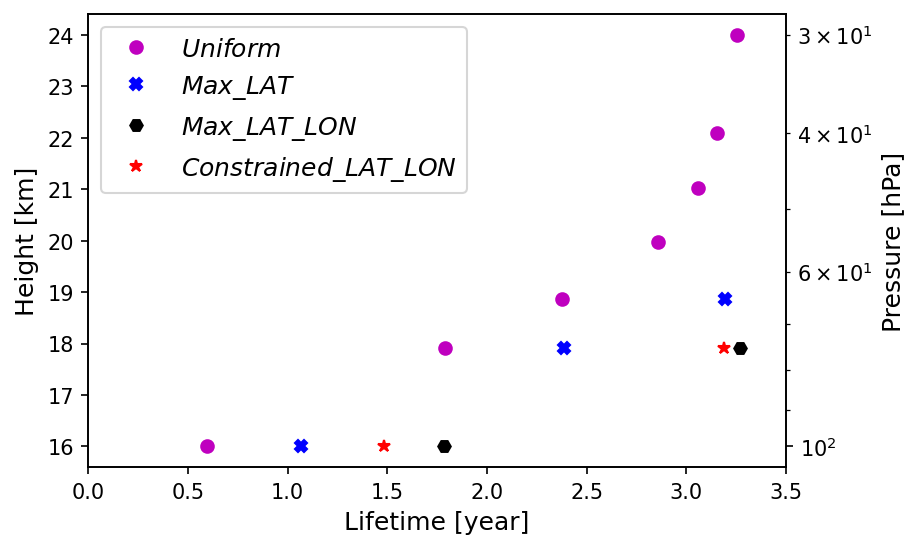

In [19]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

Life_LP_season = np.sum(Lifetime_LP[:,:,:,:], axis=(1,2))/365.25
Life_MaxLat_season = np.sum(Lifetime_MaxLat[:,:,:], axis=(1))/365.25
Life_max_season = np.sum(Lifetime_max[:,:,:,:], axis=(1,2))/365.25
Life_uniform_season = np.mean(lifetime_season[:,:,:,:],axis=(1,2))/365.25

Life_LP_z  = np.mean(Life_LP_season[:,:],axis=1)
Life_MaxLat_z = np.mean(Life_MaxLat_season[:,:],axis=1)
Life_max_z = np.mean(Life_max_season[:,:],axis=1)
Life_uniform_z = np.mean(Life_uniform_season[:,:],axis=1)

### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

###
# ax1.plot([Life_uniform_z, 1.9*Life_uniform_z], [Height, Height], '--', label='Strategy_Uni')
ax1.plot(Life_uniform_z, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,3.5)

ax1.set_xlabel('Lifetime [year]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

###
# ax3 = ax1.twinx()
# ax3.plot(Life_LP_z, Pressure, 'b*', label='LP solver lifetime')

# ax3.set_ylabel('Pressure [hPa]', fontsize=12)
# ax3.set_yscale('log')
# ax3.invert_yaxis()
# ax3.legend(loc="upper left", fontsize=12);


# plt.title('Lifetime at different height (seasonal data)', fontsize=14);

In [20]:
Life_uniform_z

array([0.59611391, 1.79025727, 2.37565753, 2.85994838, 3.05836072,
       3.15432221, 3.25394127])

In [21]:
np.max(Life_max_z)

4.765799680584075

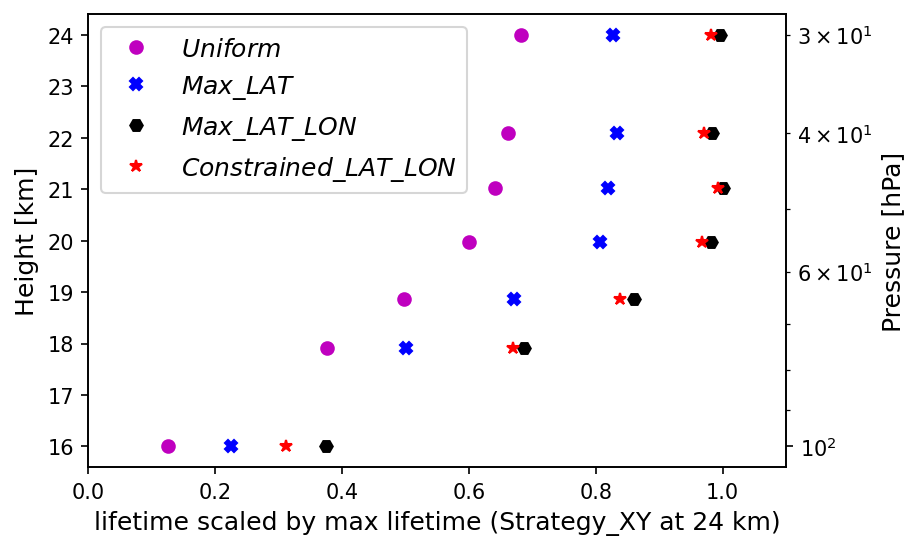

In [22]:
### plot
fig, ax1 = plt.subplots(figsize=(6,4), dpi=150)

Maximum = np.max(Life_max_z)

###
ax1.plot(Life_uniform_z/Maximum, Height, 'wo', label='Strategy_Uni')

ax1.set_xlim(0,1.1)

ax1.set_xlabel('lifetime scaled by max lifetime (Strategy_XY at 24 km)', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)
# ax1.legend(loc='center left', fontsize=12);

###
ax2 = ax1.twinx()
ax2.plot(Life_uniform_z/Maximum, Pressure, 'mo', label='$Uniform$')
ax2.plot(Life_MaxLat_z/Maximum, Pressure, 'bX', label='$Max$_$LAT$')
ax2.plot(Life_max_z/Maximum, Pressure, 'kH', label='$Max$_$LAT$_$LON$')
ax2.plot(Life_LP_z/Maximum, Pressure, 'r*', label='$Constrained$_$LAT$_$LON$')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()
ax2.legend(loc="upper left", fontsize=12);

In [28]:

# Life_max_AllMean = np.mean(Life_max_z)
# Life_LP_AllMean = np.mean(Life_LP_z)
# Life_MaxLat_AllMean = np.mean(Life_MaxLat_z)
# Life_uniform_AllMean = np.mean(Life_uniform_z)

# Life_max_AllMean, Life_LP_AllMean, Life_MaxLat_AllMean, Life_uniform_AllMean

(4.00579511749943, 3.903844967905788, 3.1875893604076357, 2.4412287566939463)

In [34]:
Life_uniform_z[3], Life_MaxLat_z[3], Life_max_z[3], Life_LP_z[3]

(2.859948384631822, 3.847056810403833, 4.682705909194616, 4.611906210503062)

In [29]:
D_lifetime_LP.shape, D_lifetime_max.shape, D_lifetime_MaxLat.shape, D_lifetime_uniform.shape

((7, 21, 24, 4), (7, 21, 24, 4), (7, 21, 4), (7, 21, 24, 4))

In [30]:
# use np.sum if a injection percent is applied to the variable before

D_lifetime_LP_XYmean      = np.sum(D_lifetime_LP, axis=(1,2))
D_lifetime_MaxLat_XYmean  = np.sum(D_lifetime_MaxLat, axis=(1))
D_lifetime_max_XYmean     = np.sum(D_lifetime_max, axis=(1,2))
D_lifetime_uniform_XYmean = np.mean(D_lifetime_uniform, axis=(1,2))

D_lifetime_LP_XYmean.shape, D_lifetime_max_XYmean.shape, D_lifetime_MaxLat_XYmean.shape, D_lifetime_uniform_XYmean.shape

((7, 4), (7, 4), (7, 4), (7, 4))

In [33]:
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=1)/365.25)
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=1)/365.25)
print(np.mean(abs(D_lifetime_max_XYmean), axis=1)/365.25)
print(np.mean(abs(D_lifetime_LP_XYmean), axis=1)/365.25)


[0.11035798 0.15818884 0.14551853 0.12061233 0.13351355 0.18473137
 0.23259726]
[0.72651723 0.86001977 0.64571735 0.75375694 0.62467773 0.44898186
 0.79995627]
[1.2226329  0.94668036 1.10349076 1.19545973 0.8656856  1.54761579
 1.3745608 ]
[0.01416123 0.03141797 0.03935158 0.04475291 0.03115356 0.04749795
 0.04721792]


In [32]:
print(np.mean(abs(D_lifetime_LP_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_max_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_MaxLat_XYmean), axis=(0,1))/365.25)
print(np.mean(abs(D_lifetime_uniform_XYmean), axis=(0,1))/365.25)

0.036507587292274914
1.1794465630194584
0.6942324511369686
0.15507426523731407
